 <b> Problem Statement 
<br> 1. Choose one dataset (audi, ford, hyundai, toyota, skoda, vw) from this link: https://github.com/SKawsar/Data_Visualization_with_Python
Original data source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw
Or choose the same dataset from HW1

<br>  <br> <br> 2. (A) Load the data, 
<br> (B) Perform Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis)
<br> (C) Split the original dataset into the train set (80%) and the test set (20%), 
<br> (D) Perform Linear Regression and Predict the 'Price' from the test set, 
<br> (E) Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)
<br> (F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.
<br> (G) Compare the actual and predicted target variable through visualization



In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

<b> Loading Data 

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/ford.csv")
display(df.head())
print(df.shape)


print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


(17964, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


<b> one hot encoding

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
features = ["mileage"]
target = ["price"]
X = df[features]
y = df[target]

print(X.shape, y.shape)

In [8]:
target = ['price']


X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(17964, 32) (17964, 1)


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 32) (3593, 32) (14371, 1) (3593, 1)


In [10]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [11]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
15,model_ Ka+,-2.969547e+03
26,transmission_Manual,-4.757194e+02
14,model_ KA,-4.506522e+02
31,fuelType_Petrol,-2.254175e+02
27,transmission_Semi-Auto,-1.472017e+02
2,mpg,-7.659271e+01
1,mileage,-6.168294e-02
22,model_ Streetka,-1.773515e-11
4,model_ C-MAX,1.086998e+03
0,year,1.123913e+03


In [12]:
model.intercept_

array([-2253986.57309204])

In [13]:

y_pred = model.predict(X_test)

In [14]:

# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1376.6117960056254
mean squared error =  3426372.061700142
root mean squared error =  1851.046207337932
coefficient of determination =  0.8484983735532727


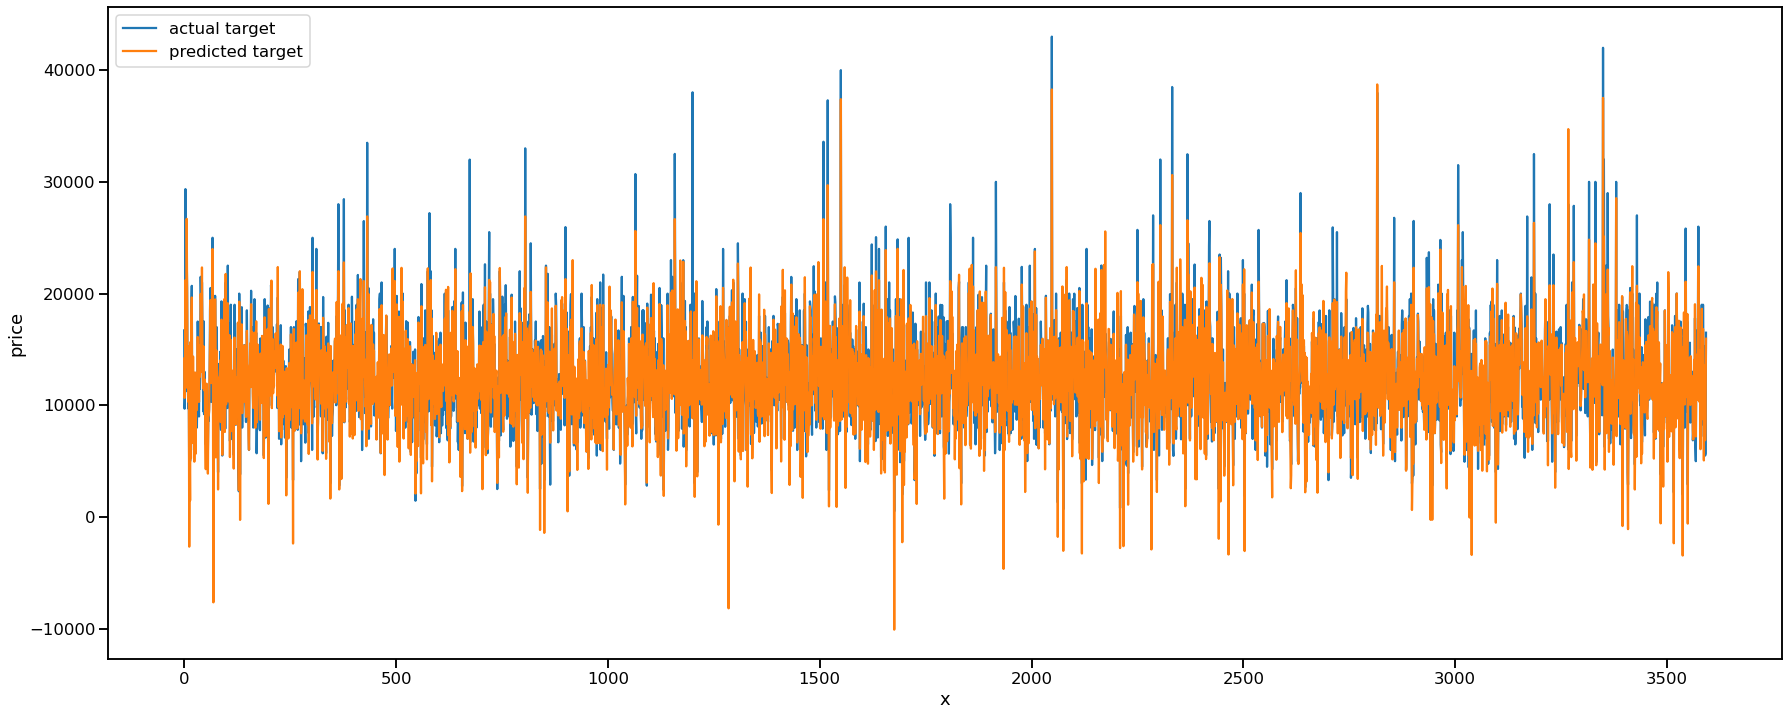

In [15]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

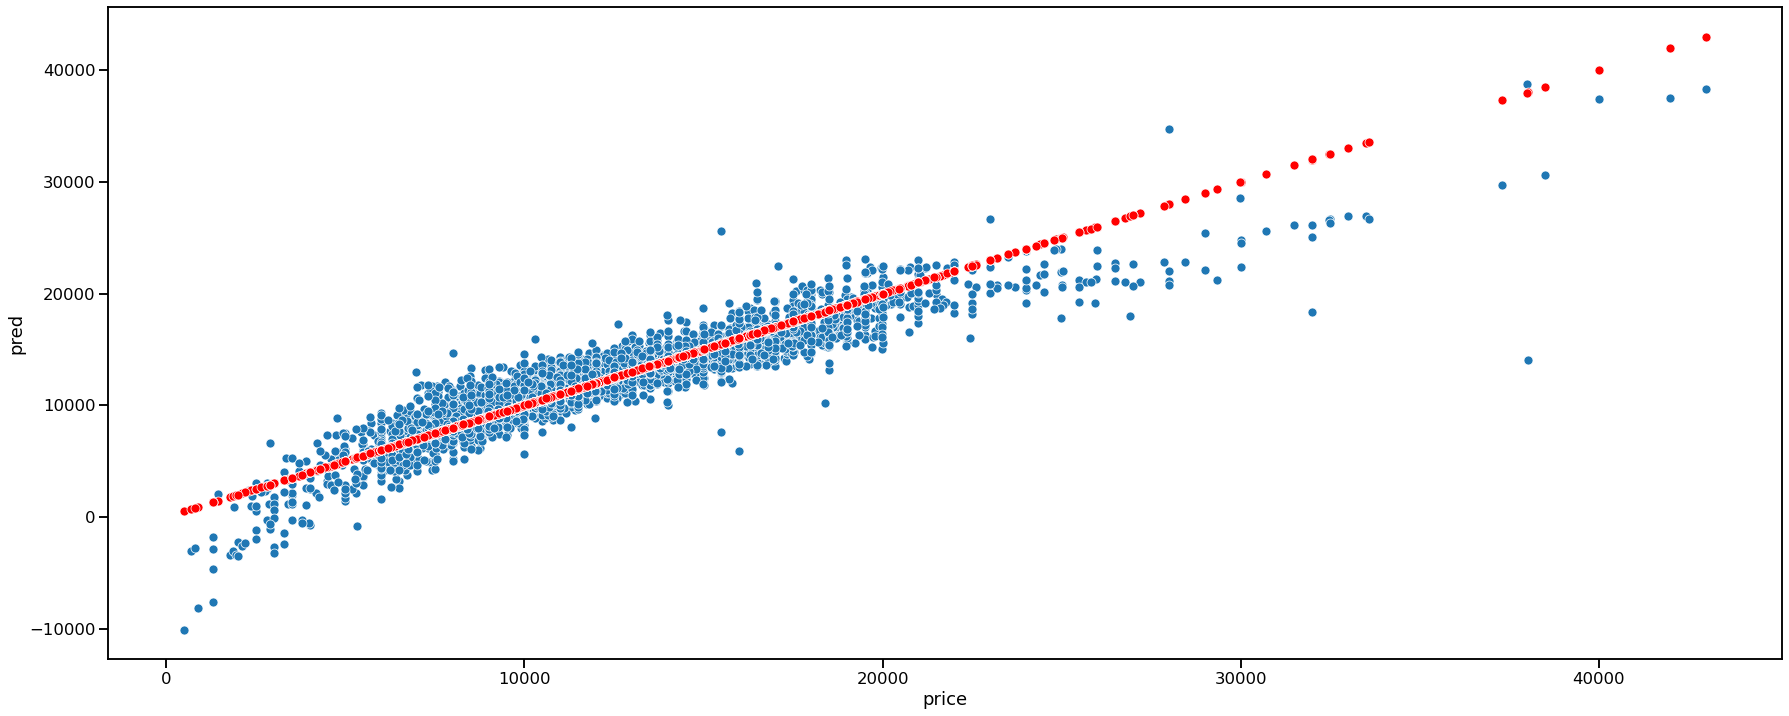

In [16]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()

<b>Create Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Separating the numeric features and target variable


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Linear regression


In [ ]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
#y_pred
print(y_pred)

In [ ]:

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)